In [2]:
from utilities.matrix_calc import calc_J_CH, calc_Sigma, calc_I_theta, Jcb, calc_basis_matrix
from models.f_on_f import FunctionOnFunctionModel
from models.s_on_f import ScalarOnFunctionModel
from optimizers.cordex_continuous import CordexContinuous
from utilities.plot_fun import subplot_results

import numpy as np

In [4]:
N = 4
Ky = 2 # KL case
Kx = [[2]] # Step
Kb = [[2]] # Polynomial
epochs = 1_000

In [5]:
I_theta = calc_I_theta(Kx=Kx, Ky=Ky)
J_CH = calc_J_CH(Kx=Kx, Kb=Kb)

Sigma_top = calc_Sigma(Kx=Kx, Ky=Ky, N=N, decay=np.inf)
Sigma_mid = calc_Sigma(Kx=Kx, Ky=Ky, N=N, decay=3)
Sigma_bot = calc_Sigma(Kx=Kx, Ky=Ky, N=N, decay=0)

J_cb = Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b) for x, b in zip(Kx[0], Kb[0])])

In [6]:
f_on_f_model_bot = FunctionOnFunctionModel(I_theta=I_theta, J_CH=J_CH, Sigma=Sigma_bot)
f_on_f_model_mid = FunctionOnFunctionModel(I_theta=I_theta, J_CH=J_CH, Sigma=Sigma_mid)
f_on_f_model_top = FunctionOnFunctionModel(I_theta=I_theta, J_CH=J_CH, Sigma=Sigma_top)

s_on_f_model = ScalarOnFunctionModel(J_cb=J_cb)

In [7]:
optimizer_f_on_f_bot = CordexContinuous(model=f_on_f_model_bot)
optimizer_f_on_f_mid = CordexContinuous(model=f_on_f_model_mid)
optimizer_f_on_f_top = CordexContinuous(model=f_on_f_model_top)

optimizer_s_on_f = CordexContinuous(model=s_on_f_model)

In [12]:
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100)

100%|██████████| 100/100 [00:00<00:00, 322.22it/s]


In [13]:
print(f"Scalar-on-function Opt Cr: {np.round(best_objective_value_s_on_f,3)}")

Scalar-on-function Opt Cr: 13.711


In [27]:
best_design_f_on_f_bot, best_objective_value_sf_on_f_bot = optimizer_f_on_f_bot.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100)
best_design_f_on_f_mid, best_objective_value_sf_on_f_mid = optimizer_f_on_f_mid.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100)
best_design_f_on_f_top, best_objective_value_sf_on_f_top = optimizer_f_on_f_top.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100)

100%|██████████| 100/100 [00:00<00:00, 177.19it/s]


In [45]:
print(f"Func-on-func Opt Cr (Top): {np.round(best_objective_value_sf_on_f_top,3)}\n"
      f"Func-on-func Opt Cr (Mid): {np.round(best_objective_value_sf_on_f_mid,3)}\n"
      f"Func-on-func Opt Cr (Bot): {np.round(best_objective_value_sf_on_f_bot,3)}")

Func-on-func Opt Cr (Top): 8.503
Func-on-func Opt Cr (Mid): 277.844
Func-on-func Opt Cr (Bot): 1087.446


FileNotFoundError: [Errno 2] No such file or directory: './results/myexp.png'

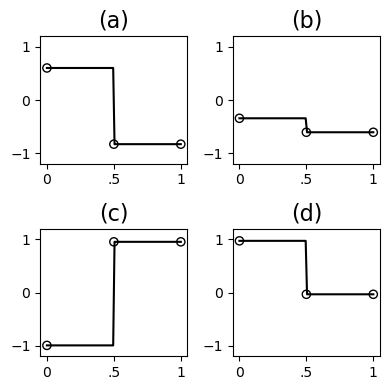

In [29]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 100), results=best_design_f_on_f_bot)

FileNotFoundError: [Errno 2] No such file or directory: './results/myexp.png'

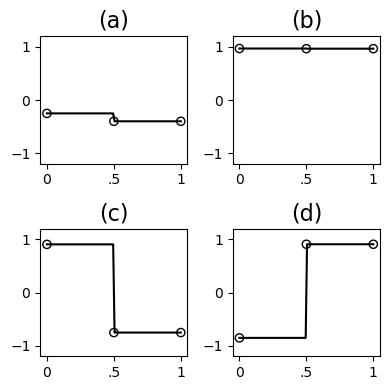

In [30]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 100), results=best_design_f_on_f_mid)

FileNotFoundError: [Errno 2] No such file or directory: './results/myexp.png'

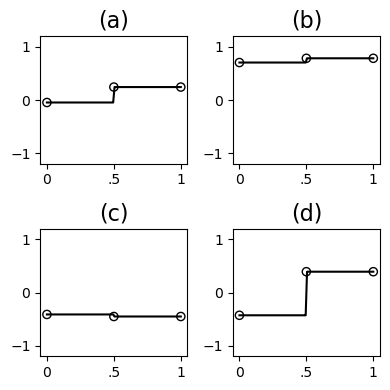

In [31]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 100), results=best_design_f_on_f_top)

In [53]:
ones = np.ones(3)
ones

array([1., 1., 1.])

In [55]:
I = np.eye(5)
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [56]:
J = np.kron(ones, I)

In [57]:
J

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [60]:
np.linalg.det(J.T @ J)

0.0